In [17]:
import os

In [18]:
dataset_path = "/kaggle/input/facial-expression-dataset/train/train"
print(os.listdir(dataset_path)) 

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


Emotion: surprise, Count: 3171
Emotion: fear, Count: 4107
Emotion: angry, Count: 3995
Emotion: neutral, Count: 4965
Emotion: sad, Count: 4830
Emotion: disgust, Count: 436
Emotion: happy, Count: 7285


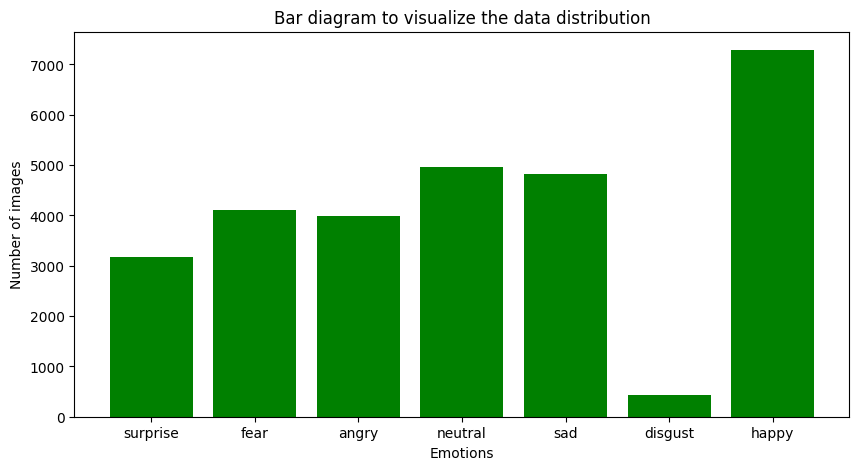

In [19]:
import matplotlib.pyplot as plt

emotions = os.listdir(dataset_path)
emotion_img_count = {}
for emotion in emotions:
    emotion_path = os.path.join(dataset_path, emotion)
    if os.path.isdir(emotion_path):
        num_imgs = len(os.listdir(emotion_path))
        emotion_img_count[emotion]=num_imgs

for emotion,count in emotion_img_count.items():
    print(f"Emotion: {emotion}, Count: {count}")

x = list(emotion_img_count.keys())
y = list(emotion_img_count.values())
plt.figure(figsize = (10,5))
plt.bar(x,y,color='green')
plt.xlabel("Emotions")
plt.ylabel("Number of images")
plt.title("Bar diagram to visualize the data distribution")
plt.show()

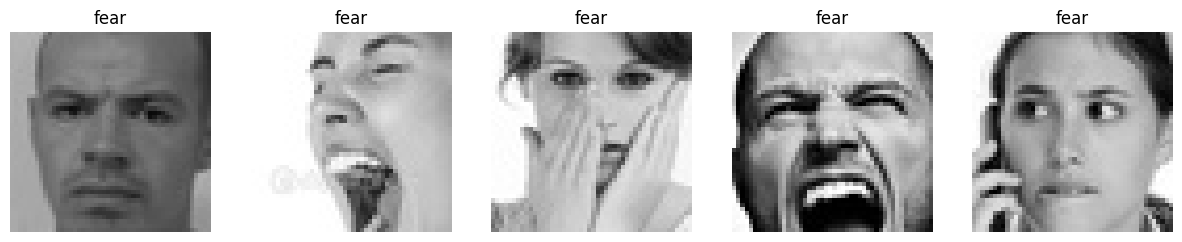

In [20]:
import random
random_emotion = random.choice(emotions)
random_emotion_path = os.path.join(dataset_path, random_emotion)
img_files = os.listdir(random_emotion_path)
random_img = random.sample(img_files,5)

import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(1,5, figsize=(15,5))


for i in range(len(random_img)):
    ax = axes[i]
    img_name = random_img[i]
    
    img_path = os.path.join(random_emotion_path, img_name)
    
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    ax.imshow(img) 
    ax.axis('off') 
    ax.set_title(random_emotion)

plt.show()


### Data Augmentation since data is very uneven

In [21]:
!pip install Augmentor

https://www.kaggle.com/code/mathurutkarsh/data-augmentation




In [22]:
import shutil

import Augmentor as ag
import os

disgust_path = "/kaggle/input/facial-expression-dataset/train/train/disgust"
disgust_aug_path = "/kaggle/working/disgust_augmented"

if os.path.exists(disgust_aug_path):
    shutil.rmtree(disgust_aug_path)

p = ag.Pipeline(source_directory=disgust_path, output_directory=disgust_aug_path)

p.rotate(probability=0.3, max_left_rotation=10, max_right_rotation=10)
p.crop_random(probability=.1, percentage_area=0.5)
p.flip_top_bottom(probability=0.3)
p.random_brightness(probability = 0.5, min_factor=0.4, max_factor=0.9)
p.random_color(probability=0.5, min_factor=0.4, max_factor=0.9)
p.random_contrast(probability=0.5, min_factor=0.9, max_factor=1.4)
p.rotate270(probability=0.3)

p.sample(4000)


Initialised with 436 image(s) found.
Output directory set to /kaggle/working/disgust_augmented.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7DD8355C3610>: 100%|██████████| 4000/4000 [00:08<00:00, 452.45 Samples/s]                   


In [23]:
surprise_path = "/kaggle/input/facial-expression-dataset/train/train/surprise"
surprise_aug_path = "/kaggle/working/surprise_augmented"

if os.path.exists(surprise_aug_path):
    shutil.rmtree(surprise_aug_path)

p = ag.Pipeline(source_directory=surprise_path, output_directory=surprise_aug_path)

p.rotate(probability=0.3, max_left_rotation=10, max_right_rotation=10)
p.crop_random(probability=.1, percentage_area=0.5)
p.flip_top_bottom(probability=0.3)
p.random_brightness(probability = 0.5, min_factor=0.4, max_factor=0.9)
p.random_color(probability=0.5, min_factor=0.4, max_factor=0.9)
p.random_contrast(probability=0.5, min_factor=0.9, max_factor=1.4)
p.rotate270(probability=0.3)

p.sample(1200)


Initialised with 3171 image(s) found.
Output directory set to /kaggle/working/surprise_augmented.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7DD83A0C6B90>: 100%|██████████| 1200/1200 [00:02<00:00, 439.96 Samples/s]                  


### Split dataset into train and test dataset

In [24]:
import shutil
from sklearn.model_selection import train_test_split

train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"

for directory in [train_dir, test_dir]:
    os.makedirs(directory, exist_ok = True)

for emotion in emotions:
    emotion_path = os.path.join(dataset_path, emotion)
    img_files = os.listdir(emotion_path)
    img_paths = [os.path.join(emotion_path, img) for img in img_files]

    train_img, test_img = train_test_split(img_paths, test_size=0.2, random_state=0)
    train_emotion_dir = os.path.join(train_dir, emotion)
    test_emotion_dir = os.path.join(test_dir, emotion)
    os.makedirs(train_emotion_dir, exist_ok=True)
    os.makedirs(test_emotion_dir, exist_ok=True)

    for img in train_img:
        shutil.copy(img, train_emotion_dir)
    for img in test_img:
        shutil.copy(img, test_emotion_dir)
    

### Merge all the augmented images into train_dataset

In [25]:
import shutil
import os

train_dir = "/kaggle/working/train"
disgust_aug_path = "/kaggle/working/disgust_augmented"
surprise_aug_path = "/kaggle/working/surprise_augmented"

disgust_train_dir = os.path.join(train_dir, "disgust")
surprise_train_dir = os.path.join(train_dir, "surprise")

os.makedirs(disgust_train_dir, exist_ok=True)
os.makedirs(surprise_train_dir, exist_ok=True)

def merge_augmented_data(augmented_path, target_path):
    if not os.path.exists(augmented_path):
        print(f"Augmented path {augmented_path} does not exist!")
        return
    
    for file_name in os.listdir(augmented_path):
        src = os.path.join(augmented_path, file_name)
        dst = os.path.join(target_path, file_name)
        shutil.move(src, dst)

merge_augmented_data(disgust_aug_path, disgust_train_dir)
merge_augmented_data(surprise_aug_path, surprise_train_dir)


In [26]:
if os.path.exists(surprise_aug_path):
    shutil.rmtree(surprise_aug_path)

if os.path.exists(disgust_aug_path):
    shutil.rmtree(disgust_aug_path)

In [27]:
!zip -r folder_train.zip /kaggle/working/train

updating: kaggle/working/train/ (stored 0%)
updating: kaggle/working/train/sad/ (stored 0%)
updating: kaggle/working/train/sad/Training_49390844.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_38241231.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_97352117.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_24723287.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_79422885.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_38511701.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_53088046.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_94396732.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_79051384.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_46887249.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_64595079.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_84112071.jpg (stored 0%)
updating: kaggle/working/train/sad/Training_88274907.jpg (stored 0%)
updating: k

In [28]:
from IPython.display import FileLink
FileLink(r'folder_train.zip')

/kaggle/working/folder_train.zip

# Below codes are run in the code2 file due to memory shortage
## That is why below codes may give error in path definition if tried to run in this file

### Labelling the images

In [29]:
def load_dataset(dataset_path):
    images = []
    labels = []

    for emotion in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path,emotion)
        for image in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path,image)
            images.append(img_path)
            labels.append(emotion)

    return images, labels

In [30]:
import pandas as pd
train_path = "/kaggle/working/train"
train_df = pd.DataFrame()
train_df['image'], train_df['label'] = load_dataset(train_path)
train_df.head()

,image,label
0,/kaggle/working/train/sad/Training_49390844.jpg,sad
1,/kaggle/working/train/sad/Training_38241231.jpg,sad
2,/kaggle/working/train/sad/Training_97352117.jpg,sad
3,/kaggle/working/train/sad/Training_24723287.jpg,sad
4,/kaggle/working/train/sad/Training_79422885.jpg,sad


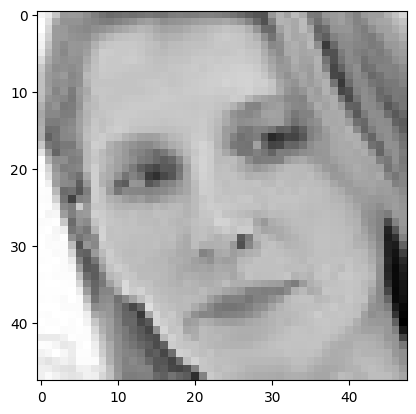

In [31]:
from PIL import Image
img = Image.open(train_df['image'][0])
plt.imshow(img, cmap = 'gray');

### loading the train and test datasets to convert them to NumPy array

In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMG_SIZE = (48, 48)  
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# Load data using generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

# Function to load entire dataset into memory efficiently
def load_data(generator):
    X, y = [], []
    for img_batch, label_batch in generator:
        X.append(img_batch)
        y.append(label_batch)
        if len(X) * BATCH_SIZE >= generator.samples:
            break  # Stop when all images are loaded
    return np.concatenate(X), np.concatenate(y)

# Load train and test data
X_train, y_train = load_data(train_generator)
X_test, y_test = load_data(test_generator)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



Found 33429 images belonging to 7 classes.


NameError: name 'test_path' is not defined

### Converting to NumPy array

https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/


https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [ ]:
from sklearn.preprocessing import OneHotEncoder
train_df = train_df.sample(frac=1, random_state=0)  
label_column = train_df[['label']]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(label_column)
column_names = encoder.get_feature_names_out(['label'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)
train_encoded = pd.concat([train_df[['image']], one_hot_df], axis=1)
print(train_encoded.iloc[0])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to sparse_categorical_crossentropy if labels are integers
              metrics=['accuracy'])

model.summary()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Track validation loss
    patience=3,          # Wait 3 epochs before reducing LR
    factor=0.5,          # Reduce LR by a factor of 0.5
    min_lr=1e-7          # Minimum LR to prevent excessive reduction
)

history = model.fit(
    train_generator,
    epochs=71,  # You can increase epochs if needed
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks=[lr_scheduler]  # Add learning rate scheduler here
)

In [ ]:
# Save the new model
model.save("model1.h5")

In [ ]:
final_train_acc = history.history["accuracy"][-1]  # Last epoch train accuracy
final_val_acc = history.history["val_accuracy"][-1]  # Last epoch validation accuracy

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")
